# Step 1: Using Build a CNN — experiment with Fashion-MNIST

- Tip: use early stopping in the validation set
- Tip: use the pipeline mentioned in https://www.tensorflow.org/datasets/keras_example

## Step 1.1: Load the libraries and the fashion mnist dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from keras import activations
from keras import backend as K

In [ ]:
# Load data
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Step 1.2: Separate and normalize the training and evaluation data.

In [ ]:
# Normalizing training data

#Normalizes images: uint8 -> float32
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [ ]:
# Defining testing data
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Step 1.3: Create and train the model.

In [ ]:
# Create
# LeNET5
model = tf.keras.models.Sequential([
  # convolutional and pooling network 
  tf.keras.layers.Conv2D(6, 5, padding = 'same',  activation = 'relu', input_shape = [28, 28, 1]),
  tf.keras.layers.AveragePooling2D(2),
  # convolutional and pooling network 
  tf.keras.layers.Conv2D(16, 5, padding = 'same',  activation = 'relu'),
  tf.keras.layers.AveragePooling2D(2),
  # convolutional network 
  tf.keras.layers.Conv2D(120, 5, padding = 'same',  activation = 'relu'),
  tf.keras.layers.Flatten(),
  # multi layer perceptron - MLP
  tf.keras.layers.Dense(84, activation="relu"),
  tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 5880)              0

In [ ]:
# Compile
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) #tf.keras.optimizers.Adam(0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = tf.keras.metrics.SparseCategoricalAccuracy() #tf.keras.metrics.Accuracy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics,
)

In [ ]:
# Training
epochs = 100
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
callbacks = [early_stopping_cb]

history = model.fit(
    ds_train,
    epochs=epochs,
    validation_data=ds_test,
    callbacks = callbacks
)

Epoch 1/100
469/469 [==============================] - 86s 162ms/step - loss: 1.2864 - sparse_categorical_accuracy: 0.6550 - val_loss: 0.4192 - val_sparse_categorical_accuracy: 0.8732
Epoch 2/100
469/469 [==============================] - 66s 140ms/step - loss: 0.3377 - sparse_categorical_accuracy: 0.8983 - val_loss: 0.2761 - val_sparse_categorical_accuracy: 0.9123
Epoch 3/100
469/469 [==============================] - 65s 138ms/step - loss: 0.2509 - sparse_categorical_accuracy: 0.9238 - val_loss: 0.2073 - val_sparse_categorical_accuracy: 0.9365
Epoch 4/100
469/469 [==============================] - 64s 136ms/step - loss: 0.2041 - sparse_categorical_accuracy: 0.9380 - val_loss: 0.1708 - val_sparse_categorical_accuracy: 0.9503
Epoch 5/100
469/469 [==============================] - 65s 139ms/step - loss: 0.1730 - sparse_categorical_accuracy: 0.9484 - val_loss: 0.1457 - val_sparse_categorical_accuracy: 0.9567
Epoch 6/100
469/469 [==============================] - 64s 137ms/step - loss: 0.

## Step 1.4: Evaluate and save model.



In [ ]:
# Evaluate
test = model.evaluate(ds_test)

79/79 [==============================] - 4s 48ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9860


In [ ]:
# Save model
model_name = "conv_model.h5"
model.save(model_name)

# Save history
with open('conv_model.pickle', 'wb') as f:
    pickle.dump(history, f)

# Step 2: Plot learning curves (loss, validation loss)

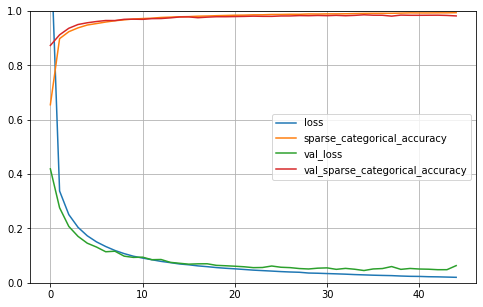

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Step 3: Report the error in the test set

In [ ]:
get_percentage_str = lambda x: str(round(x*100,4))
print("Accuracy of the test set is {}%".format(get_percentage_str(test[1])))
print("Error of the test set is {}%".format(get_percentage_str(test[0])))

Accuracy of the test set is 98.6%
Error of the test set is 4.516%
